## Importing necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_sales = pd.read_csv("SuperStore Sales.csv")
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Preparation and Cleaning

In [3]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [5]:
df_sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df_sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df_sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
sniff_modified(df_sales)

,data type,percent missing,No. unique,unique values
Row ID,int64,0.000000,9800,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Postal Code,float64,0.112245,627,"[42420.0, 90036.0, 33311.0, 90032.0, 28027.0, ..."
Sales,float64,0.000000,5757,"[261.96, 731.94, 14.62, 957.5775, 22.368, 48.8..."
Ship Date,object,0.000000,1326,"[11/11/2017, 16/06/2017, 18/10/2016, 14/06/201..."
Ship Mode,object,0.000000,4,"[Second Class, Standard Class, First Class, Sa..."
Customer ID,object,0.000000,793,"[CG-12520, DV-13045, SO-20335, BH-11710, AA-10..."
Customer Name,object,0.000000,793,"[Claire Gute, Darrin Van Huff, Sean O'Donnell,..."
Segment,object,0.000000,3,"[Consumer, Corporate, Home Office]"
Product Name,object,0.000000,1849,"[Bush Somerset Collection Bookcase, Hon Deluxe..."
City,object,0.000000,529,"[Henderson, Los Angeles, Fort Lauderdale, Conc..."


In [10]:
# categorical_columns = df_sales.select_dtypes(include=['object']).columns
# unique_counts = {col: df_sales[col].nunique() for col in categorical_columns}

Removing the rows with Null values in the dataset as they correspond to 0.1% of the entire dataset and would have minimal affect on the analysis of the dataset.

The null values could also be filled according to the corresoponding city and state values


In [11]:
df_sales['Postal Code'].fillna(5401, inplace=True)
df_sales['Postal Code'] = df_sales['Postal Code'].astype(int)

In [12]:
# Convert 'Order Date' and 'Ship Date' to datetime
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Ship Date'] = pd.to_datetime(df_sales['Ship Date'])

In [13]:
sniff_modified(df_sales)

,data type,percent missing,No. unique,unique values
Postal Code,int32,0.0,627,"[42420, 90036, 33311, 90032, 28027, 98103, 761..."
Row ID,int64,0.0,9800,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Ship Date,datetime64[ns],0.0,1326,"[2017-11-11T00:00:00.000000000, 2017-06-16T00:..."
Sales,float64,0.0,5757,"[261.96, 731.94, 14.62, 957.5775, 22.368, 48.8..."
Order Date,datetime64[ns],0.0,1230,"[2017-08-11T00:00:00.000000000, 2017-12-06T00:..."
Ship Mode,object,0.0,4,"[Second Class, Standard Class, First Class, Sa..."
Customer ID,object,0.0,793,"[CG-12520, DV-13045, SO-20335, BH-11710, AA-10..."
Customer Name,object,0.0,793,"[Claire Gute, Darrin Van Huff, Sean O'Donnell,..."
Segment,object,0.0,3,"[Consumer, Corporate, Home Office]"
Product Name,object,0.0,1849,"[Bush Somerset Collection Bookcase, Hon Deluxe..."


In [14]:
df_sales['Order Date']

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order Date, Length: 9800, dtype: datetime64[ns]

## Analysis

### Sales by Category and Sub-Category

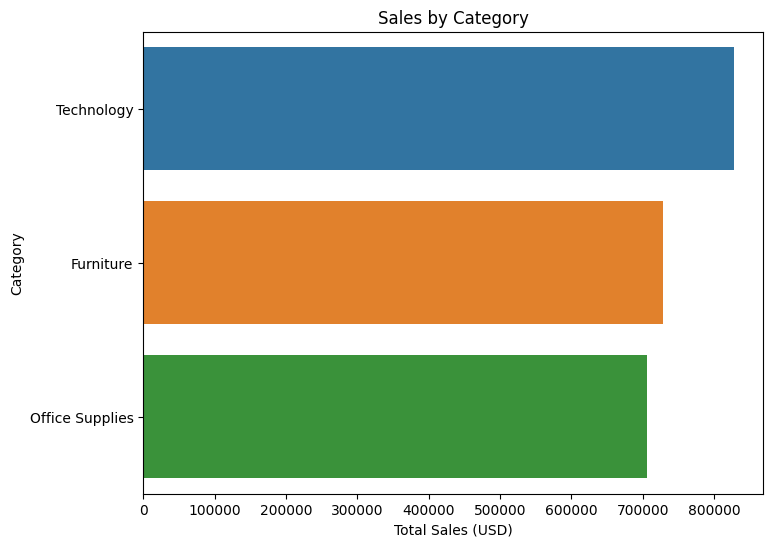

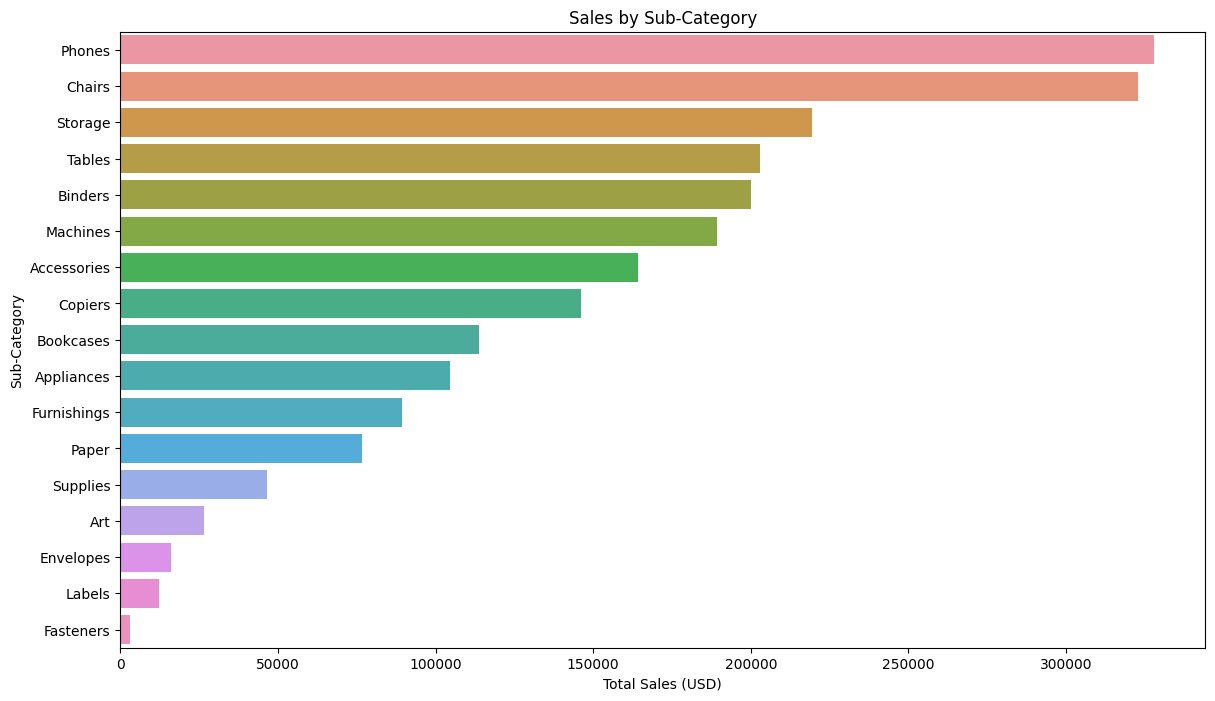

In [39]:
# Group by 'Category' and 'Sub-Category' and sum 'Sales' separately
category_sales = df_sales.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
subcategory_sales = df_sales.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Plotting sales by category
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales', y='Category', data=category_sales)
plt.title('Sales by Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Category')
plt.show()

# Plotting sales by sub-category
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Sub-Category', data=subcategory_sales)
plt.title('Sales by Sub-Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Sub-Category')
plt.show()



### Sales by Region

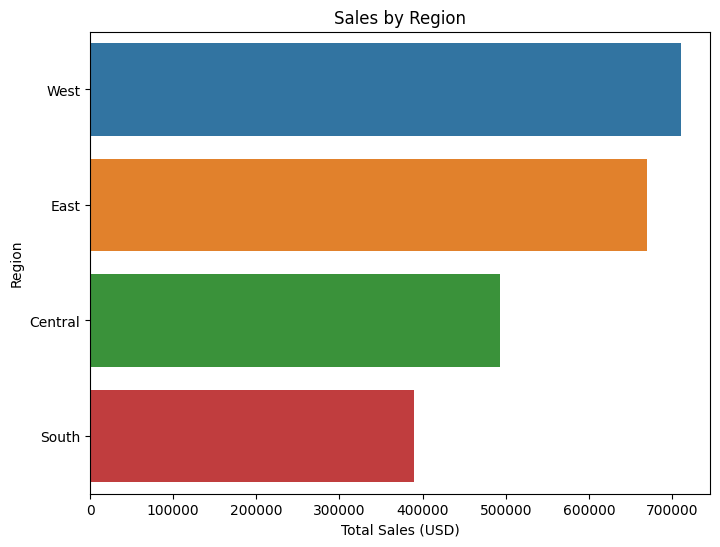

In [23]:
# Group by 'Region' and sum 'Sales'
region_sales = df_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

# Plotting sales by region
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales', y='Region', data=region_sales)
plt.title('Sales by Region')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Region')
plt.show()

### Sales by Region and Segment

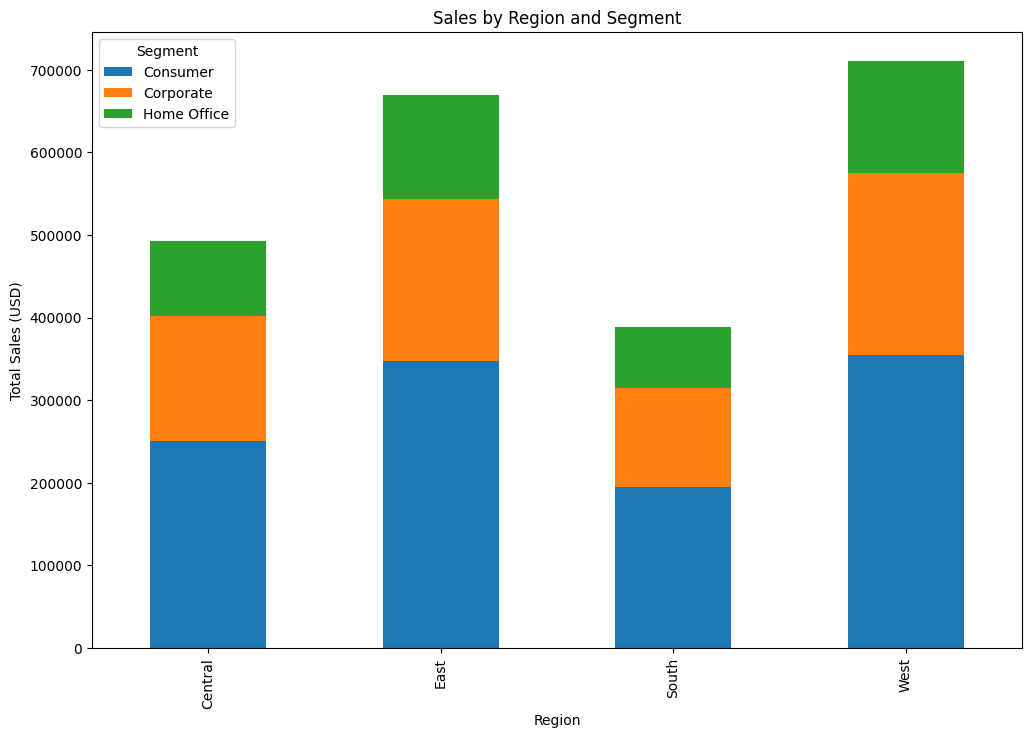

In [43]:
region_segment_sales = df_sales.groupby(['Region', 'Segment'])['Sales'].sum().unstack()

region_segment_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales by Region and Segment')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Segment')
plt.show()


### Sale Distribution by Customer Segement

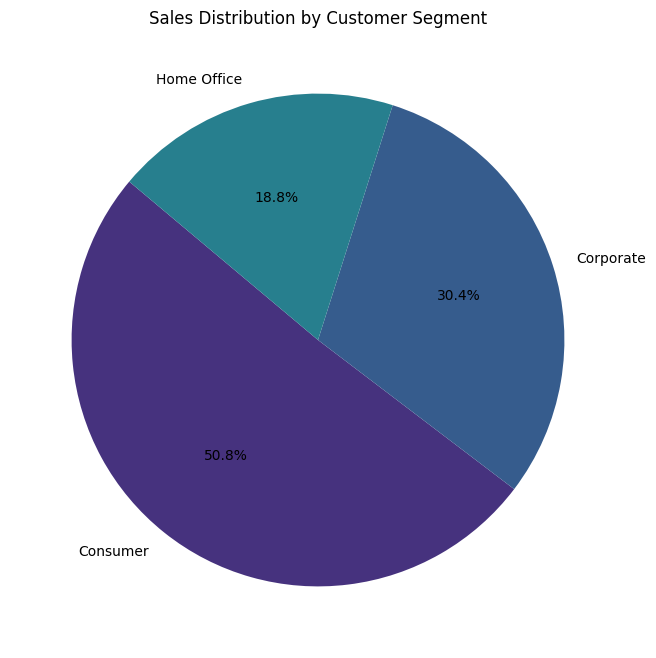

In [26]:
# Plotting a pie chart for sales by customer segment
segment_sales_trend = df_sales.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(segment_sales_trend['Sales'], labels=segment_sales_trend['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Sales Distribution by Customer Segment')
plt.show()


### Product Performance Analysis (Sales by Product)

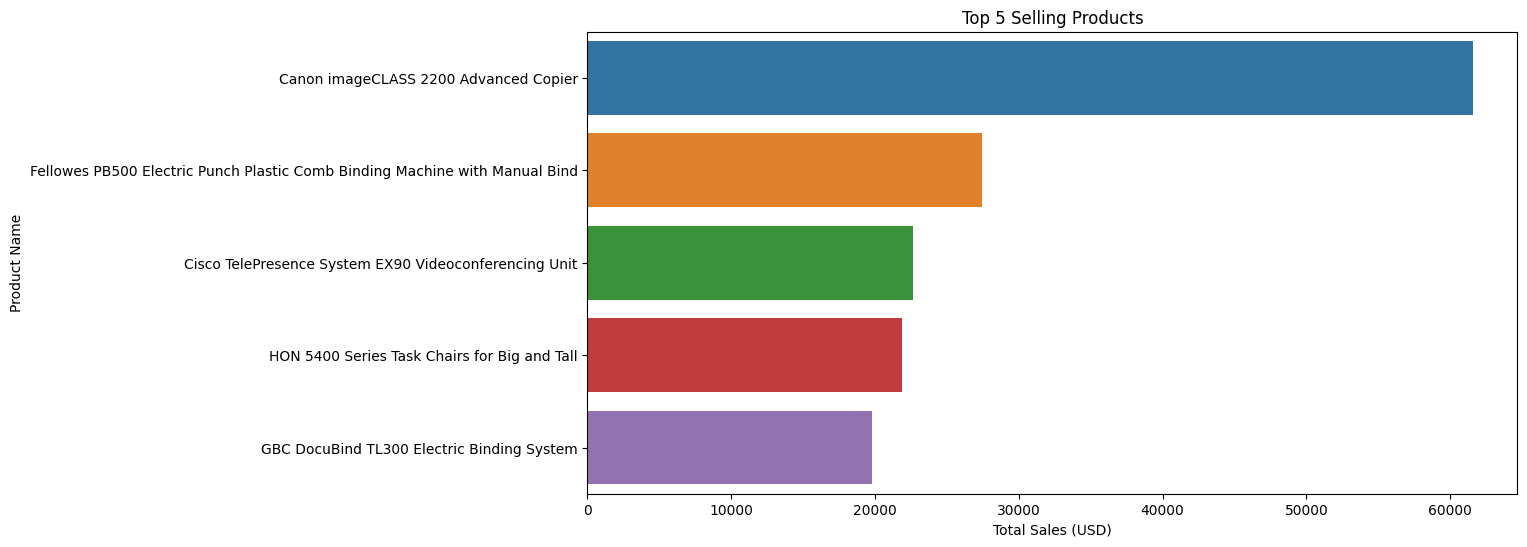

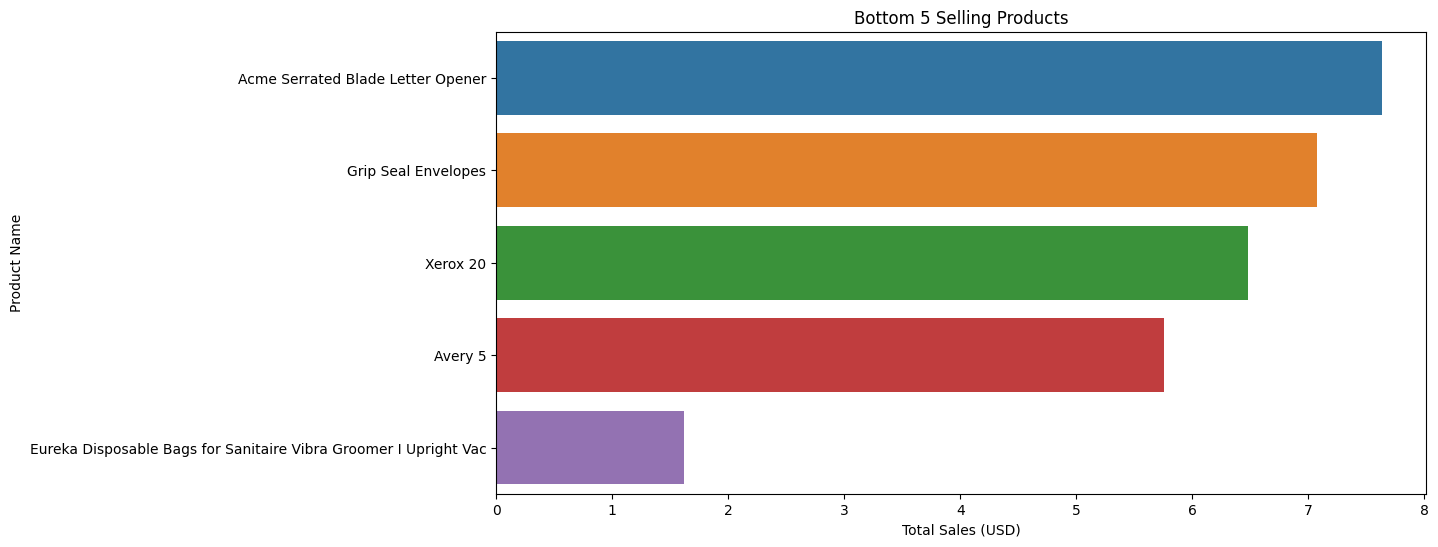

In [38]:
# Top-selling and least-selling products
product_sales = df_sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).reset_index()

# Top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=product_sales.head(5))
plt.title('Top 5 Selling Products')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()

# Bottom 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=product_sales.tail(5))
plt.title('Bottom 5 Selling Products')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()


### Seasonal Sales Analysis (Sales Trends Over Months)

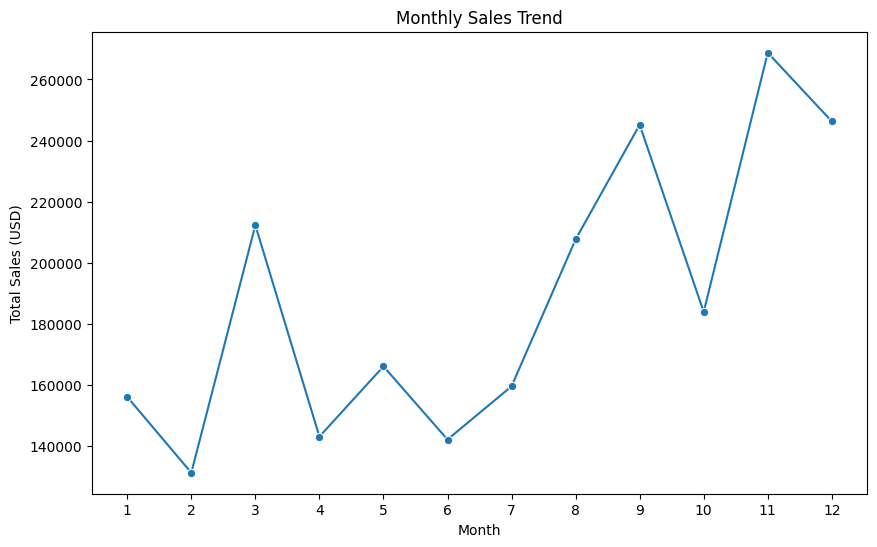

In [32]:
df_sales['Month'] = df_sales['Order Date'].dt.month
monthly_sales = df_sales.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(range(1, 13))
plt.show()


### Sales by Ship Mode

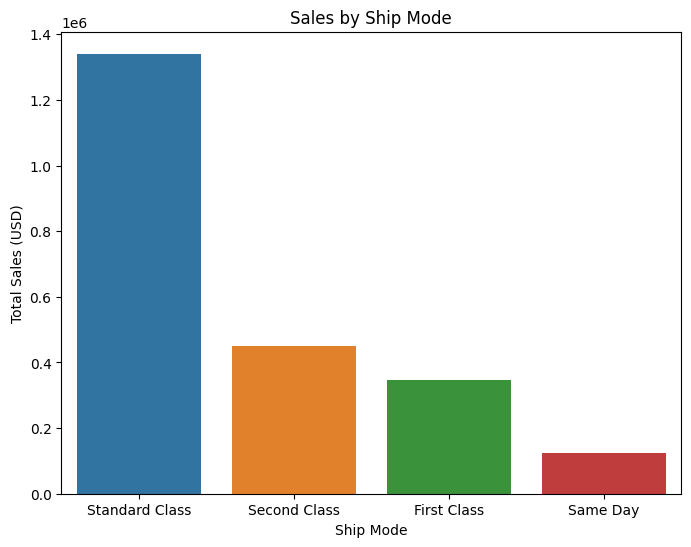

In [42]:
ship_mode_sales = df_sales.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Ship Mode', y='Sales', data=ship_mode_sales)
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales (USD)')
plt.show()


### Average Order Value (AOV) by Segment

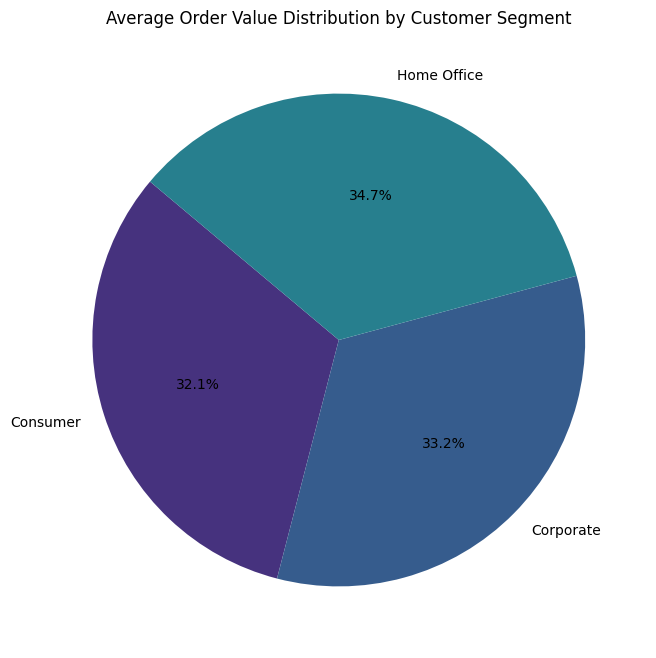

In [40]:
segment_avg_order = df_sales.groupby('Segment')['Sales'].mean().reset_index()

# plt.figure(figsize=(8, 6))
# sns.barplot(x='Segment', y='Sales', data=segment_avg_order)
# plt.title('Average Order Value by Segment')
# plt.xlabel('Customer Segment')
# plt.ylabel('Average Order Value')
# plt.show()

plt.figure(figsize=(8, 8))
plt.pie(segment_avg_order['Sales'], labels=segment_avg_order['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Average Order Value Distribution by Customer Segment')
plt.show()